# Исследование данных о российском кинопрокате

Заказчик данного исследования — Министерство культуры Российской Федерации. Нужно изучить рынок российского кинопроката и выявить текущие тренды. Необходимо уделить внимание фильмам, которые получили государственную поддержку, а так же ответить на вопрос, насколько такие фильмы интересны зрителю.

Исследование проводится с данными, опубликованными на портале открытых данных Министерства культуры. Набор данных содержит информацию о прокатных удостоверениях, сборах и государственной поддержке фильмов, а также информацию с сайта КиноПоиск.

- датасет `mkrf_movies` содержит данные о прокатных удостоверениях;
- `mkrf_shows` - данные о прокате в российских кинотеатрах.

## Объединение датасетов и получение общей информации

Объединю таблицы, чтобы все объекты из датасета `mkrf_movies` обязательно вошли в получившийся датафрейм `films`.

Открою датафреймы `mkrf_movies` и `mkrf_shows` и выведу общую информацию. Буду объединять две таблицы по столбцу `puNumber`, проверю какой тип данных там содержится.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [2]:
mkrf_movies = pd.read_csv('/datasets/mkrf_movies.csv')
mkrf_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

In [3]:
mkrf_shows = pd.read_csv('/datasets/mkrf_shows.csv')
mkrf_shows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


После вывода общей информации о датафрейме `mkrf_shows` я увидела, что тип данных в колонке `puNumber` - object. Это кажется странным, так как данные должны быть числовыми, поэтому проверю все ли значения в колонке `puNumber` являются числами:

In [4]:
mkrf_movies[~mkrf_movies['puNumber'].str.isnumeric()]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
804,Паранормальный Якутск,111004112,2012-08-24T12:00:00.000Z,Художественный,ИП Тимофеев К.П.,Россия,К.Тимофеев,NaN,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,NaN,NaN
1797,Курбан-роман. (История с жертвой),нет,2014-05-15T12:00:00.000Z,Художественный,"ФОНД ""ИННОВАЦИЯ""",Россия,С.Юзеев,М.Галицкая,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN


В столбце `puNumber` в  таблице `mkrf_movies` есть строка со значением 'нет'. А так же одна строка с символом табуляции в конце номера.

От строки с 'нет' можно избавиться, на ход исследования это не повлияет. Вторая строка преобразуется в числовой тип несмотря на символ табуляции.

In [5]:
mkrf_movies = mkrf_movies.query('puNumber != "нет"')
mkrf_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7485 non-null   object 
 1   puNumber               7485 non-null   object 
 2   show_start_date        7485 non-null   object 
 3   type                   7485 non-null   object 
 4   film_studio            7467 non-null   object 
 5   production_country     7483 non-null   object 
 6   director               7476 non-null   object 
 7   producer               6917 non-null   object 
 8   age_restriction        7485 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

После того, как не осталось строковых значений, методом astype() преобразую столбец `puNumber` в датафрейме `mkrf_movies` в тип int.

In [6]:
mkrf_movies['puNumber'] = mkrf_movies['puNumber'].astype('int')
mkrf_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7485 non-null   object 
 1   puNumber               7485 non-null   int64  
 2   show_start_date        7485 non-null   object 
 3   type                   7485 non-null   object 
 4   film_studio            7467 non-null   object 
 5   production_country     7483 non-null   object 
 6   director               7476 non-null   object 
 7   producer               6917 non-null   object 
 8   age_restriction        7485 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

Далее объединю обе таблицы в один датафрейм `films` методом merge():

In [7]:
films = mkrf_movies.merge(mkrf_shows, on='puNumber', how='left')

Выведу общую информацию о датафрейме `films`.

In [8]:
films.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7484
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7485 non-null   object 
 1   puNumber               7485 non-null   int64  
 2   show_start_date        7485 non-null   object 
 3   type                   7485 non-null   object 
 4   film_studio            7467 non-null   object 
 5   production_country     7483 non-null   object 
 6   director               7476 non-null   object 
 7   producer               6917 non-null   object 
 8   age_restriction        7485 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

In [9]:
films.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN


In [10]:
films.describe()

,puNumber,refundable_support,nonrefundable_support,budget,box_office
count,7.485000e+03,3.320000e+02,3.320000e+02,3.320000e+02,3.158000e+03
mean,1.351966e+08,1.186446e+07,4.898099e+07,1.272297e+08,7.647870e+07
std,3.835292e+07,2.491656e+07,5.998012e+07,1.885883e+08,2.403531e+08
min,1.811096e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.120251e+08,0.000000e+00,2.500000e+07,4.200000e+07,8.623900e+04
50%,1.210155e+08,0.000000e+00,3.000000e+07,6.864992e+07,2.327988e+06
75%,1.240033e+08,1.500000e+07,4.037500e+07,1.419853e+08,2.397967e+07
max,2.310011e+08,1.800000e+08,4.000000e+08,2.305074e+09,3.073569e+09


**Вывод:** получена общая информация о датафрейме `films`. Таблица содержит 7485 строк и 16 столбцов. Больше половины колонок имеют пропущенные значения. Их необходимо проанализировать и обработать. В датафрейме встречаются три типа данных: int64, float64 и object. Так же столбец `puNumber` содержит в названии и сторочные и прописные буквы - для удобства написания я приведу этот столбец к "змеиному_регистру" и к строчным буквам в названии.

## Предобработка данных

Первичная обработка датафрейма начинается с переименования столбцов, изменения типов данных, обработки пропущенных значений, поиска явных и неявных дубликатов.

### Переименование столбцов

In [11]:
films = films.rename(columns={'puNumber': 'pu_number'})

### Преобразование типов данных

Преобразую тип столбца `show_start_date` к формату datetime:

In [12]:
films['show_start_date'] = pd.to_datetime(films['show_start_date'])

Данные столбца `ratings` имеют тип данных object. Выведу уникальные названия, чтобы посмотреть, какие там значения:

In [13]:
films['ratings'].unique()

array(['7.2', '6.6', '6.8', '7.7', '8.3', '8.0', '7.8', '8.1', '7.1',
       '6.0', '7.4', '5.8', '8.7', '6.3', '6.9', '5.0', '4.3', '7.3',
       '7.0', '6.4', nan, '8.2', '7.5', '6.7', '7.9', '5.9', '6.2', '5.6',
       '6.5', '2.4', '7.6', '6.1', '8.6', '8.5', '8.8', '5.5', '5.1',
       '5.7', '5.4', '99%', '4.4', '4.5', '5.3', '4.1', '8.4', '2.6',
       '3.8', '4.6', '4.8', '4.0', '3.0', '1.6', '4.2', '5.2', '4.7',
       '4.9', '3.9', '2.7', '3.3', '2.9', '28%', '3.7', '1.4', '3.1',
       '97%', '3.5', '3.2', '2.8', '1.5', '2.1', '2.5', '9.2', '3.4',
       '1.1', '3.6', '83%', '64%', '91%', '94%', '62%', '79%', '90%',
       '19%', '88%', '1.0', '89%', '1.3', '1.9', '1.8', '1.2', '1.7',
       '9.0', '98%', '8.9', '9.1'], dtype=object)

Есть значения рейтингов, которые указаны в процентах, на КиноПоиске это рейтинг ожидания, а он обычно ниже, чем обычный. Поэтому заменю их на пропуски через coerce.

In [14]:
films['ratings'] = pd.to_numeric(films['ratings'], errors='coerce')

In [15]:
films['ratings'].unique()

array([7.2, 6.6, 6.8, 7.7, 8.3, 8. , 7.8, 8.1, 7.1, 6. , 7.4, 5.8, 8.7,
       6.3, 6.9, 5. , 4.3, 7.3, 7. , 6.4, nan, 8.2, 7.5, 6.7, 7.9, 5.9,
       6.2, 5.6, 6.5, 2.4, 7.6, 6.1, 8.6, 8.5, 8.8, 5.5, 5.1, 5.7, 5.4,
       4.4, 4.5, 5.3, 4.1, 8.4, 2.6, 3.8, 4.6, 4.8, 4. , 3. , 1.6, 4.2,
       5.2, 4.7, 4.9, 3.9, 2.7, 3.3, 2.9, 3.7, 1.4, 3.1, 3.5, 3.2, 2.8,
       1.5, 2.1, 2.5, 9.2, 3.4, 1.1, 3.6, 1. , 1.3, 1.9, 1.8, 1.2, 1.7,
       9. , 8.9, 9.1])

В столбцах `refundable_support`, `nonrefundable_support`, `budget`, `box_office` для удобства восприятия избавлюсь от е-формата и приведу значения к млн.руб.

In [16]:
films[
    ['refundable_support', 'nonrefundable_support', 'budget', 'box_office']
] = films[
    ['refundable_support', 'nonrefundable_support', 'budget', 'box_office']] / 1000000

### Обработка пропущенных значений

Чтобы увидеть количество пропущенных значений в каждом столбце применю метод isna() в сочетании с sum().

In [17]:
films.isna().sum()

title                       0
pu_number                   0
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support       7153
nonrefundable_support    7153
budget                   7153
financing_source         7153
ratings                   995
genres                    975
box_office               4327
dtype: int64

Столбцы `film_studio`, `production_country` и `director` имеют небольшое количество пропущенных строк - в сумме 29. Это 0,39% от всех данных. Я принимаю решение удалить пропуски в этих колонках.

In [18]:
films = films.dropna(subset=['film_studio', 'production_country', 'director'])

Данные в колонках `refundable_support`, `nonrefundable_support`, `budget` и `financing_source` заполнены только для тех фильмов, которые получили государственную поддержку, и как видно по сумме пропусков, для большинства фильмов гос.поддержки не было.

Фильмы с государственной поддержкой будут исследованы отдельно, поэтому пропущенные значения в этих столбцах удалять нельзя.

В столбце `producer` содержится 568 пропусков. Из сторонних источников я узнала, что в СССР такой профессии как продюсер не существовало, она называлась иначе - директор фильма. Возможно, отсюда и могли возникнуть пропуски в данном столбце. 

Столбцы `ratings` и `genres` содержат пропущенные значения, поскольку эти данные важны для исследования, удалять их нецелесообразно.

Столбец `box_office` отражает информацию о сборах денежных средств в кинотеатрах, пропуски в этом столбце означают, что не для всех фильмов есть информация о прокатных сборах.

### Изучение дубликатов

На наличие дубликатов буду проверять категориальный столбец `title`, в котором содержатся названия фильмов. При вызове первых пяти строк я заметила, что встречаются три строки с одинаковым названием фильма "Особо опасен". Отличие только в номере прокатного удостоверия и дате премьеры. Так как вся информация о фильме (режиссер, продюсер, студия-производитель, страна и тд) одинаковая, я решила изучить вопрос о прокатном удостоверении фильмов: https://ru.wikipedia.org/wiki/Прокатное_удостоверение 

Прокатное удостоверение выдается на каждую демонстрацию фильма, то есть для показа в кинотеатре и показа на телевидении нужно получать новый прокатный номер - и из-за этого на один и тот же фильм может быть несколько номеров. Отсюда и получаются дублирующиеся названия фильмов.

На официальном сайте Министерства культуры можно получить всю информацию о фильме: https://culture.gov.ru/services/reestr-prokatnykh-udostovereniy/435345/

Проверю столбец `title` на наличие дубликатов:

In [19]:
films['title'].duplicated().sum()

713

Однако, у разных кинофильмов могут совпадать названия, при том, что страна-производитель и режиссер разные. В таком случае, дубликаты нужно устранять с учетом нескольких параметров, в данном случае название фильма, режиссер, бюджет и сборы.

In [20]:
films_info = films[['title', 'director', 'budget', 'box_office']]
films_info.head()

,title,director,budget,box_office
0,Открытый простор,Кевин Костнер,NaN,NaN
1,Особо важное задание,Е.Матвеев,NaN,NaN
2,Особо опасен,Тимур Бекмамбетов,NaN,NaN
3,Особо опасен,Тимур Бекмамбетов,NaN,NaN
4,Особо опасен,Тимур Бекмамбетов,NaN,NaN


Проверю, сколько реальных дублей фильмов содержатся в исходных данных:

In [21]:
films_info.duplicated().sum()

493

Удалю такие дубликаты:

In [22]:
films_info = films_info.drop_duplicates(keep='last')
films_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6965 entries, 0 to 7484
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   title       6965 non-null   object 
 1   director    6965 non-null   object 
 2   budget      332 non-null    float64
 3   box_office  3155 non-null   float64
dtypes: float64(2), object(2)
memory usage: 272.1+ KB


Уберу дубликаты из исходной таблицы:

In [23]:
films = films.query('index in @films_info.index').reset_index(drop=True)

Проверю, остались ли дубликаты по названию фильма:

In [24]:
films['title'].duplicated().sum()

220

Проверю, что оставшиеся дубликаты - это разные фильмы с одинаковыми названиями:

In [25]:
films[films['title'].duplicated(keep=False)].sort_values(by='title').head()

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2867,13 часов: Тайные солдаты Бенгази,221019616,2016-04-19 12:00:00+00:00,Художественный,"Парамаунт, Дан Филмз, Латина Пикчарз,3 Арт Инт...",США,Майкл Бэй,"Майкл Бэй, Эрвин Стофф",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.7,"боевик,триллер,драма",NaN
2868,13 часов: Тайные солдаты Бенгази,121001016,2016-01-15 12:00:00+00:00,Художественный,"Парамаунт, Дан Филмз, Латина Пикчарз,3 Арт Инт...",США,Майкл Бэй,"Майкл Бэй, Эрвин Стофф",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.7,"боевик,триллер,драма",18.439241
1296,13-й район: Кирпичные особняки,221033314,2014-08-20 12:00:00+00:00,Художественный,"Брик Мэншэнс Продакшнз,Синэ+ Канал+, Д8, Европ...",Франция-Канада,Камиль Деламарр,"Люк Бессон, Клод Леже, Джонатан Вэнджер",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,5.5,"боевик,криминал",NaN
1297,13-й район: Кирпичные особняки,121008314,2014-04-25 12:00:00+00:00,Художественный,"Брик Мэншэнс Продакшнз,Синэ+ Канал+, Д8, Европ...",Франция-Канада,Камиль Деламарр,"Люк Бессон, Клод Леже, Джонатан Вэнджер",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,5.5,"боевик,криминал",0.000750
3618,Аватар_,121008910,2010-05-12 12:00:00+00:00,Художественный,"ХХ век Фокс, Дан Интертейнмент, Гиант Студиос,...",США,Джеймс Кэмерон,"Брук Бретон, Джеймс Кэмерон, Джон Лондау",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.9,"фантастика,боевик,драма",0.006950


### Обработка категориальных значений

Почти во всех категориальных столбцах встречается не единстенное описание информации о фильме, а именно:

- в столбце `production_country` в качестве студии-производителя указано несколько названий, что означает, что над фильмом работали несколько студий; 
- в столбцах `director` и `producer` во многих строках перечислены два и более человека, участвовавших в создании фильма; 
- в столбце `production_country` встречаются несколько стран, где был снят фильм; 
- в столбце `genres` указан не только основной жанр фильма, но и так же причастные жанры; 
- в столбце `financing_source` есть строки с несколькими источниками финансирования.

Проверю категориальный столбец `type` на наличие уникальных значений:

In [26]:
films['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', ' Художественный', ' Анимационный',
       'Музыкально-развлекательный'], dtype=object)

Видно, что встречаются названия с лишним пробелом в начале, из-за чего некоторые типы фильмов дублируются. Методом str.strip() избавлюсь от некорректно заполненных значений.

In [27]:
films['type'] = films['type'].str.strip()

Чтобы сократить название возрастного ограничения в колонке `age_restriction`, использую регулярное выражение:

In [28]:
films['age_restriction'] = films['age_restriction'].str.extract(r'(\d+\+)')

### Обработка количественных значений

Когда я начала исследовать колонку с бюджетом, то обнаружила следующее: непустые строки с бюджетом встречаются в 332 строках - именно столько фильмов получили государственную поддержку, и ожидалось, что они должны быть заполнены значениями больше нуля. Но при проверке я увидела, что есть строки с нулевым значением. Это странно, поскольку изначальная иформация говорила о том, что данные в этом столбце указаны только для тех фильмов, которые получили государственную поддержку.

С помощью среза query() проверю сколько строк содержат нули:

In [29]:
len(films.query('budget == 0'))

17

Заполню нулевые значения, используя коэффициент, который показывает во сколько раз бюджет превышает поддержку, умноженный на сумму поддержек.

In [30]:
films_budget = films.query('budget != 0')
budget_ratio = films_budget['budget'] / (
    films_budget['refundable_support'] + films_budget['nonrefundable_support']
)

In [31]:
budget_ratio_mean = budget_ratio[budget_ratio.notna()].mean()
round(budget_ratio_mean, 2)

2.43

In [32]:
films['budget'] = films['budget'].where(
    films['budget'] != 0, 
    (films['refundable_support'] + films['nonrefundable_support']) * budget_ratio_mean
)

In [33]:
len(films.query('budget == 0'))

0

### Добавление новых столбцов

Создам столбец с информацией о годе проката и выделю год из даты премьеры фильма:

In [34]:
films['show_year'] = films['show_start_date'].dt.year

Добавлю новые столбцы с именем и фамилией главного режиссёра, основным жанром фильма и главной студией:

In [35]:
films['first_director'] = films['director'].str.split(',').str[0]

In [36]:
films['first_genre'] = films['genres'].str.split(',').str[0]

In [37]:
films['first_studio'] = films['film_studio'].str.split(',').str[0]

Посчитаю, какую долю от общего бюджета фильма составляет государственная поддержка:

In [38]:
films['budget_ratio'] = round(
    (films['refundable_support'] + films['nonrefundable_support']) / films['budget'], 2
)

## Исследовательский анализ данных

- чтобы изучить информацию о том, сколько выходило фильмов в прокат каждый год, сгруппирую данные и построю столбчатую диаграмму.

In [39]:
plt.rcParams['figure.figsize'] = [8, 8]
sns.set_theme(style="whitegrid")

Text(0.5, 1.0, 'number of films')

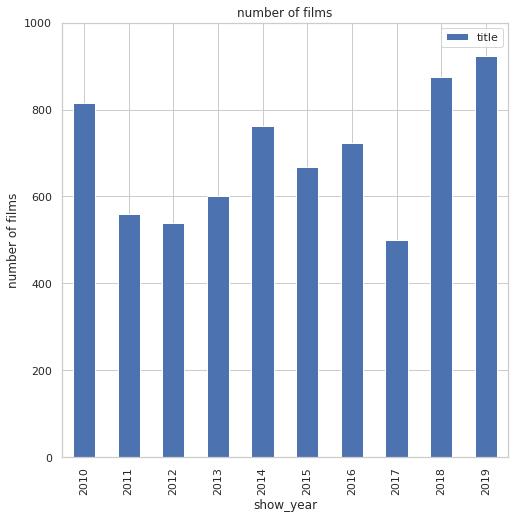

In [40]:
films.pivot_table(
    index='show_year', values='title', aggfunc='count'
).plot(kind='bar', grid=True, ylim=(0, 1000))
plt.ylabel('number of films')
plt.title('number of films')

***Анализ графика:*** по данным столбчатого графика больше всего фильмов в прокат выходило в 2019-м году (чуть больше 900 фильмов), меньше всего фильмов - в 2017-м году (500 фильмов).

- далее посмотрю, сколько фильмов выходило в прокат в кинотеатре (по данным о кассовых сборах).

Text(0.5, 1.0, 'number of films at the box office')

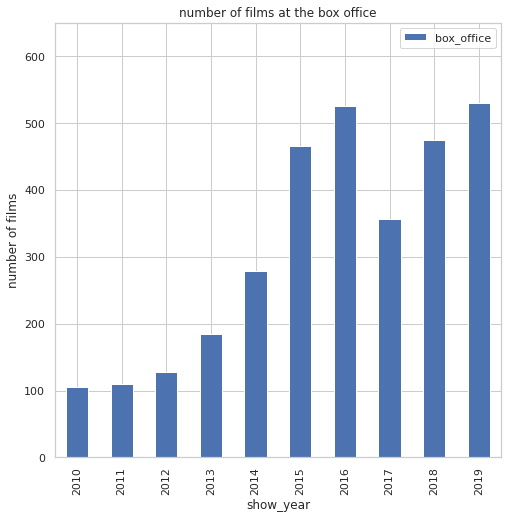

In [41]:
films.pivot_table(
    index='show_year', values='box_office', aggfunc='count'
).plot(kind='bar', grid=True, ylim=(0, 650))
plt.ylabel('number of films')
plt.title('number of films at the box office')

***Анализ графика:*** с выходом фильмов в прокат в кинотеатре по годам, можно сказать, что с 2010 по 2016 года количество фильмов увеличивалось из года в год со 100 до 520 фильмов. Далее в 2017 году произошел резкий спад показа фильмов в кинотеатре до 350 фильмов. И к 2019 году количество фильмов возрасло примерно до 530.

- посчитаю какую долю составляют фильмы с информацией о прокате в кинотеатрах от общего количества фильмов, выходивших в прокат в каждом году.

In [42]:
films.pivot_table(
    index='show_year', values='box_office', aggfunc='count'
)['box_office'] / films.pivot_table(
    index='show_year', values='title', aggfunc='count'
)['title']

show_year
2010    0.128834
2011    0.194643
2012    0.235185
2013    0.306667
2014    0.366142
2015    0.696108
2016    0.726141
2017    0.714000
2018    0.542334
2019    0.574215
dtype: float64

**Вывод:** с 2010 по 2014 года содержится мало информации о прокатных сборах (меньше 30%), поэтому их нельзя брать для дальнейшей оценки. Рассматривать можно только 2015-2019 года в дальнейшем исследовании сборов.

- изучу как менялась динамика проката по годам. Построю график и посмотрю, в каком году была максимальная сумма сборов, а в каком минимальная.

In [43]:
films_after_2014 = films.query('show_year > 2014')

Text(0.5, 1.0, 'distribution of box office receipts by year')

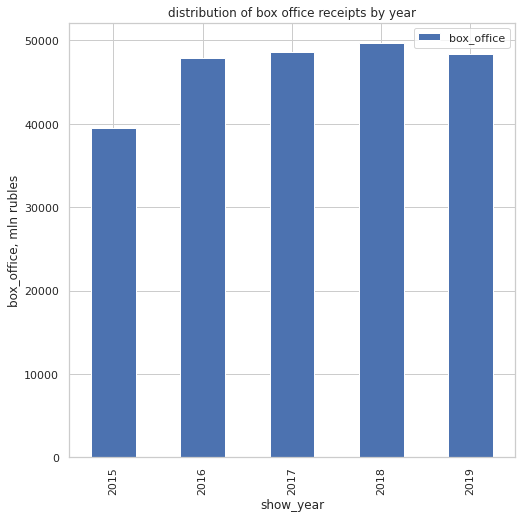

In [44]:
films_after_2014.pivot_table(
    index='show_year', values='box_office', aggfunc='sum'
).plot(kind='bar', grid=True)
plt.ylabel('box_office, mln rubles')
plt.title('distribution of box office receipts by year')

***Анализ графика:*** в 2015 году сборы были минимальные - 40 млрд.руб. С 2016 по 2019 года сборы держались в одном диапазоне - 48-49 млрд.руб., но все же максимальные сборы оказались в 2018 году - 50 млрд.руб.

- с помощью сводной таблицы посчитаю среднюю и медианную сумму сборов для каждого года.

In [45]:
films_after_2014.query('box_office.notna()').pivot_table(
    index='show_year', values='box_office', aggfunc=['mean', 'median']
)

,mean,median
,box_office,box_office
show_year,,
2015,84.940570,4.920933
2016,91.173534,3.915041
2017,136.032793,9.968340
2018,104.785574,8.911534
2019,91.369262,4.627798


- определю, влияет ли возрастное ограничение аудитории на сборы фильма в прокате в период с 2015 по 2019 год.

Text(0, 0.5, 'box_office, mln rubles')

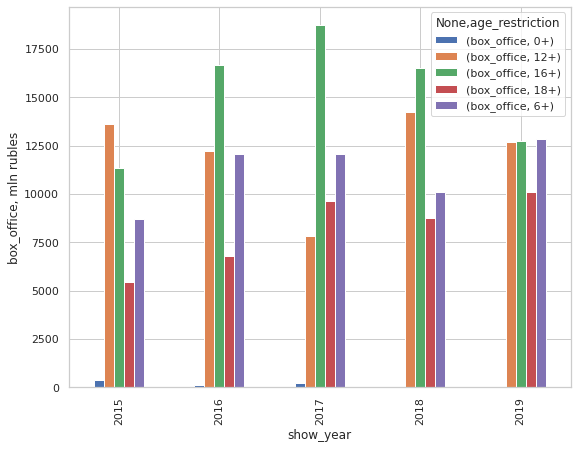

In [46]:
films_after_2014.pivot_table(
    index='show_year', columns='age_restriction', values=['box_office'], aggfunc='sum'
).plot(kind='bar', grid=True, figsize=(9,7))
plt.ylabel('box_office, mln rubles')

По данным столбчатой диаграммы можно сделать следующий **вывод:**

- в 2015 году больше всего денежных средств в прокате собрали фильмы с возрастным ограничением "12+" - почти 14 млрд.рублей;
- в 2016 году картина изменилась: на первое место по сборам вышли фильмы с возрастным ограничением "16+" - они собрали 16 млрд. рублей:
- в 2017 году также по сборам лидируют фильмы с возрастным ограничением "16+", только уже с суммой сборов ~ 18,5 млрд.рублей;
- в 2018 году ситуация следующая: фильмы с возрастным ограничением "12+" и "16+" собрали почти одиннаковую сумму сборов, но все же фильмы с ограниченим "16+" немного больше - 16 млрд.рублей. В сравнении с прошлым годом наблюдается спад по сборам в этой группе по возрастному ограничению. Тогда как фильмы с "12+" принесли в два раза больше сборов по сравению с 2017 годом.
- в 2019 году три группы с возрастным ограничением "6+", "12+", "16+" собрали равные денежные средства в прокате - 13 млрд.руб.

Группа с ограничем "0+" с годами перестала приносить значительные сборы и к 2018 году цифры приблизились к нулю. Категория фильмов "18+" включает в себя специфические жанры - ужасы, психологические триллеры, фильмы, содержащие сцены насилия и тд, и поэтому эта категория отсекает большое число зрителей.

Таким образом, начиная с 2016 года фильмы с ограничением "16+" приносили наибольший доход в сравнении с остальными группами. Можно предположить, что в эту категорию попадают самые распрастраненные жанры фильмов, которые интресны большей части аудитории.

- посмотрю, какую общую сумму сборов принесли фильмы в прокате в каждом анализируемом году.

In [47]:
films_after_2014.pivot_table(index='show_year', values='box_office', aggfunc='sum')

,box_office
show_year,
2015,39497.365196
2016,47866.105215
2017,48563.707218
2018,49668.361909
2019,48425.708780


***Вывод:*** по сгруппированным данным видно, что суммарные сборы от 2015 до 2017 года росли - с 39 млрд.руб. до 48 млрд.руб., потом с 2017 по 2019 года сумма сборов держалась примерно в равных значениях - 48 млрд.руб. Можно предположить, что с 2017 года стали показывать больше фильмов в кинотеатрах, которые стали приносить стабильный доход.

- исследую рынок российского кинопроката, и посмотрю, какой жанр является наиболее популярным у зрителей:

Text(0.5, 1.0, 'popular genre')

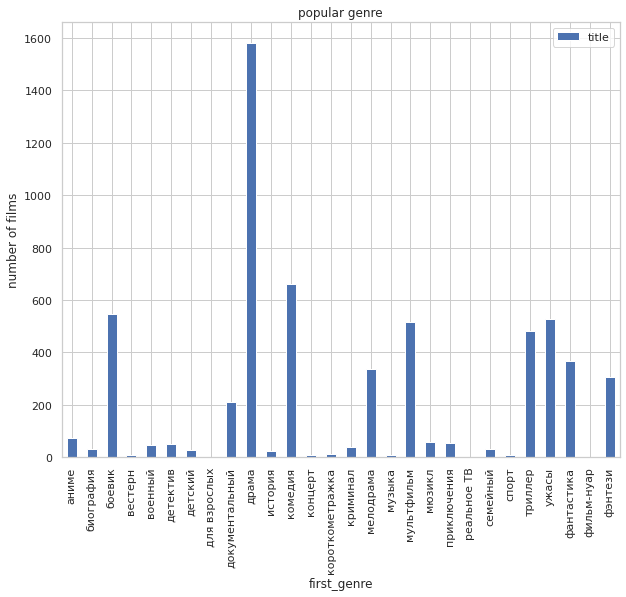

In [48]:
films.pivot_table(
    index='first_genre', values='title', aggfunc='count'
).plot(kind='bar', grid=True, figsize=(10,8))
plt.ylabel('number of films')
plt.title('popular genre')

***Анализ графика:*** лидирующую позицию занимает жанр "драма" - почти 1600 фильмов, на втором месте - "комедия" - чуть более 600 фильмов, примерно одинаково распределены следующие жанры: боевик, мультфильм, триллер и ужасы.

- посмотрю, какой средний рейтинг у фильмов в зависимости от их жанра:

Text(0.5, 1.0, 'distribution of rating by genre of the film')

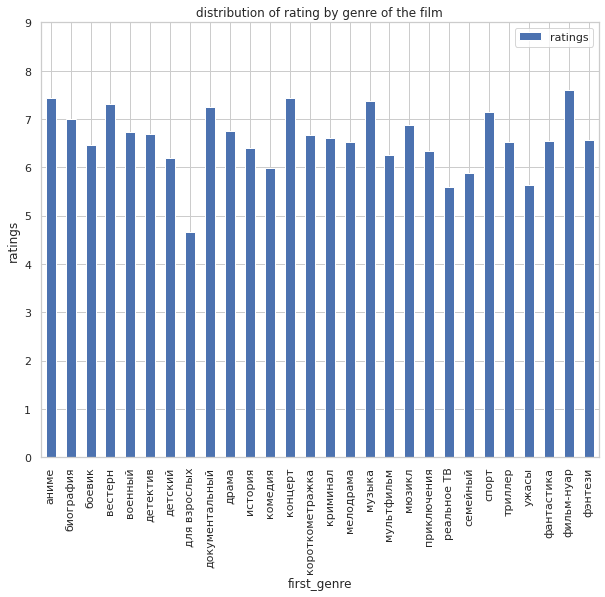

In [49]:
films.pivot_table(
    index='first_genre', values='ratings', aggfunc='mean'
).plot(kind='bar', grid=True, ylim=(0, 9), figsize=(10,8))
plt.ylabel('ratings')
plt.title('distribution of rating by genre of the film')

***Анализ графика:*** не смотря на то, что популярными являются одни жанры, высокие рейтинги совсем у других жанров фильмов.

### Исследование фильмов, которые получили государственную поддержку

Создам новый датафрейм `support_films`, в который войдут фильмы с государственной поддержкой:

In [50]:
support_films = films.query('budget.notna()').reset_index(drop=True)

Добавлю новый столбец с суммарным значением средств с государственной поддержкой:

In [51]:
support_films['state_support'] = support_films['refundable_support'] + support_films['nonrefundable_support']

Добавлю столбец с информацией о том, во сколько раз окупился фильм:

In [52]:
support_films['box_office_ratio'] = support_films['box_office'] / support_films['budget']

Создам отдельный датафрейм с информацией об окупившихся фильмах:

In [53]:
payback_films = support_films.query('box_office > budget')

- *исследование окупаемости фильмов с государственной поддержкой*

In [54]:
round(len(payback_films) / len(support_films), 3)

0.217

По полученному значению, можно сделать **вывод**, что только **каждый пятый фильм с государственной поддержкой окупается**.

Посмотрю какой рейтинг у фильмов с гос.поддержкой, которые окупились:

Text(0.5, 1.0, 'histogram of rating distribution for films with state support')

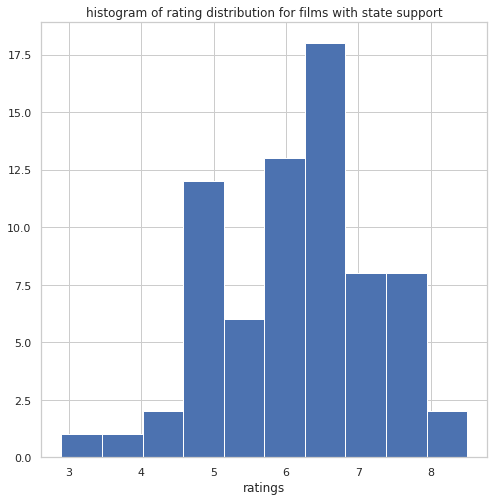

In [55]:
payback_films['ratings'].hist(grid=True)
plt.xlabel('ratings')
plt.title('histogram of rating distribution for films with state support')

***Анализ графика:*** на гистограмме видно, что **у большей части окупившихся фильмов рейтинг лежит в диапазоне от 4.6 до 7.2.**

- *исследование рейтинга от жанра*

Посмотрю, какой рейтинг у фильмов с гос.поддержкой с группировкой по жанрам:

Text(0.5, 1.0, 'rating of films with state support')

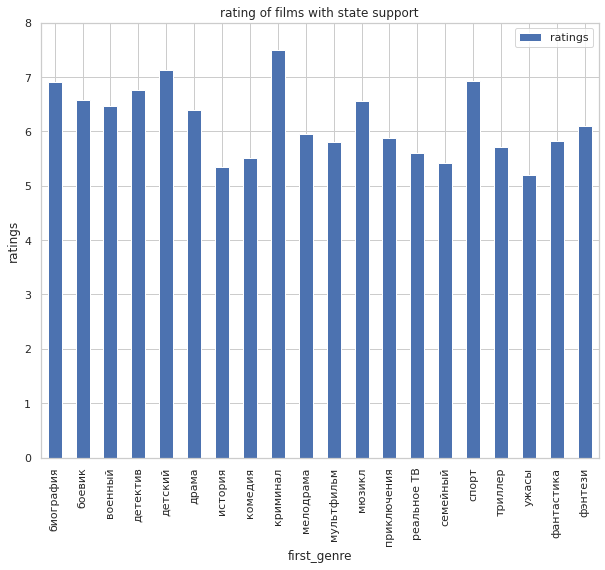

In [56]:
support_films.pivot_table(
    index='first_genre', values='ratings'
).plot(kind='bar', grid=True, ylim=(0,8), figsize=(10,8))
plt.ylabel('ratings')
plt.title('rating of films with state support')

***Анализ графика:*** самый высокий рейтинг - 7.5 - у криминальных картин, около 7 - у трех жанров - биография, детский и спорт.

А теперь посмотрю, какой рейтинг у окупившихся фильмов с гос.поддержкой с группировкой по жанрам:

Text(0.5, 1.0, 'rating of films with state support')

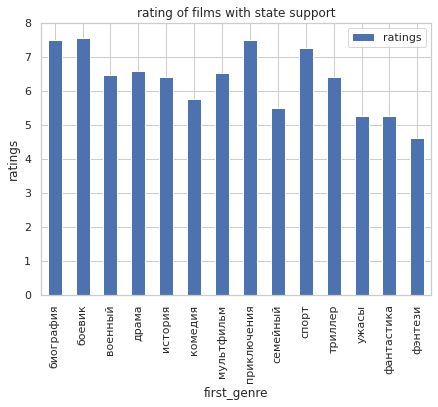

In [57]:
payback_films.pivot_table(
    index='first_genre', values='ratings'
).plot(kind='bar', grid=True, ylim=(0,8), figsize=(7,5))
plt.ylabel('ratings')
plt.title('rating of films with state support')

***Анализ графика:*** картина изменилась, во-первых, среди окупившихся фильмов нет жанра "криминал". Во-вторых, лидирующие позиции заняли два жанра - приключенческие фильмы и боевики - 7.5 баллов. Чуть меньше рейтинга набрали фильмы с жанром биография, спорт, драма и триллер.

- *исследование зависимости государственной поддержки от жанра фильма*

Посмотрю, на какие жанры фильмов больше всего выделяется гос.поддержка. Для этого построю столбчатый график по сгруппированным данным:

Text(0.5, 1.0, 'genres of films with state support')

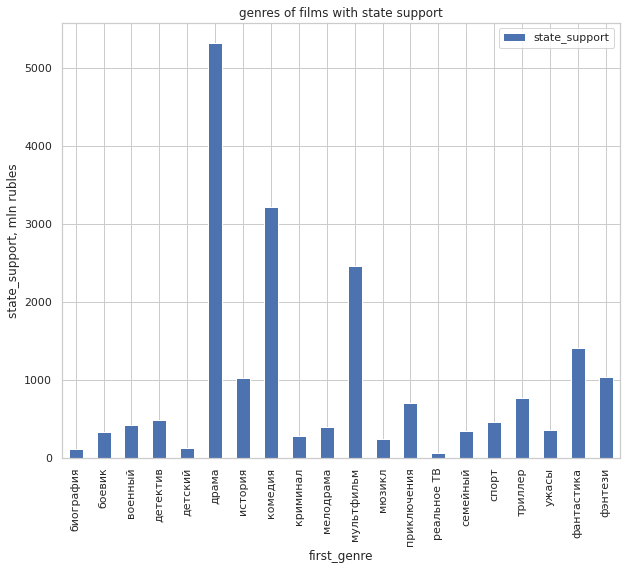

In [58]:
support_films.pivot_table(
    index='first_genre', values='state_support', aggfunc='sum'
).plot(kind='bar', grid=True, figsize=(10,8))
plt.ylabel('state_support, mln rubles')
plt.title('genres of films with state support')

In [59]:
support_films['first_genre'].value_counts(normalize=True)

драма          0.294304
комедия        0.234177
мультфильм     0.098101
триллер        0.047468
мелодрама      0.047468
фэнтези        0.034810
фантастика     0.034810
ужасы          0.031646
военный        0.028481
семейный       0.022152
приключения    0.022152
боевик         0.018987
детектив       0.015823
детский        0.012658
история        0.012658
мюзикл         0.012658
биография      0.009494
спорт          0.009494
криминал       0.009494
реальное ТВ    0.003165
Name: first_genre, dtype: float64

***Вывод:*** больше всего средств гос.поддержки выделяется для жанра "драма" - более 5 млрд.руб. На втором месте "комедия" - 3 млрд.руб. Для жанра "мультфильмы" - почти 2 млрд.руб. Как мне кажется, эти три самых популярных и востребованных жанра охватывают наибольший круг интересов зрителей, включая детей. Остальные жанры, возможно, интресны меньшему числу людей.

In [60]:
support_films['box_office'].corr(support_films['ratings'])

0.15514925929843776

***Вывод:*** по вычисленному коэффициенту корреляции Пирсона видно, что сборы не всегда коррелируются с рейтингом фильма. Высокий рейтинг не гарантирует хорошие сборы, и наоборот.

- *окупаемость фильмов у конкретного режиссера*

Посмотрю, сколько фильмов, снятых одним режиссером, окупились:

In [61]:
payback_films.pivot_table(
    index='first_director', values='title', aggfunc='count'
).sort_values(by='title', ascending=False).head(10)

,title
first_director,
Д.Дьяченко,4
Р.Прыгунов,2
С.Мокрицкий,2
Д.Шмидт,2
Р.Гигинеишвили,2
Д.Киселев,2
С.Подгаевский,2
Т.Бекмамбетов,2
Л.Марголин,2


***Вывод:*** всего у одного режиссера - Д.Дьяченко, окупилось наибольшее количество фильмов.

- *окупаемость фильма у студии-производителя*

Так же посмотрю, есть ли киностудии, чьи фильмы окупились более одного раза и сколько бюджетных средств было потрачено:

In [62]:
payback_films.pivot_table(
    index='first_studio', values=['state_support', 'budget'], 
    aggfunc={'state_support': ['sum','count'], 'budget': 'sum'}
).sort_values(by=('state_support', 'count'), ascending=False).head(10)

budget state_support  \
                                                   sum         count   
first_studio                                                           
ООО "ТаББаК"                               1228.314292             5   
ООО "Студия анимационного кино "Мельница"   729.223087             4   
ООО "Водород 2011"                          895.522344             3   
ООО "Киностудия "Слово"                     327.988234             2   
ООО "Ол Медиа Компани"                      162.355066             2   
ООО "Пиманов и партнеры"                    372.513841             2   
ООО "Студия "ТРИТЭ" Никиты Михалкова"      1225.476058             2   
ООО "Друг Друга"                            133.949127             2   
ООО "Фреш-Фильм"                             91.305313             2   
ООО "Лемон Филмз Студио"                    493.733957             1   

                                                       
                                                  sum  
first_studio                                           
ООО "ТаББаК"                               663.000000  
ООО "Студия анимационного кино "Мельница"  305.000000  
ООО "Водород 2011"                         410.000000  
ООО "Киностудия "Слово"                    135.000000  
ООО "Ол Медиа Компани"                      96.000000  
ООО "Пиманов и партнеры"                   100.123915  
ООО "Студия "ТРИТЭ" Никиты Михалкова"      842.104482  
ООО "Друг Друга"                            60.000000  
ООО "Фреш-Фильм"                            50.000000  
ООО "Лемон Филмз Студио"                   225.000000

***Вывод:*** студия ООО "ТаББаК" и ООО "Студия анимационного кино "Мельница" сняли окупаемые фильмы с единичной разницей, но при этом сумма потраченных бюджетных средств отличается в два раза. При этом выделенные средства составили половину от суммарного бюджета фильмов.

Киностудии, которые сняли по 2 окупившихся фильма, имеют разную градацию потраченных денежных средств.

- *зависимость сборов от доли государственной поддержки в бюджете*

<AxesSubplot:xlabel='budget_ratio', ylabel='box_office_ratio'>

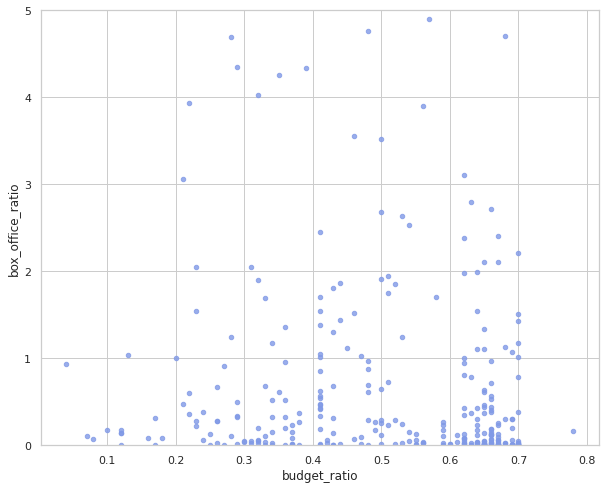

In [63]:
color = np.array([.5, .6, .9])
support_films.plot(
    kind='scatter', y='box_office_ratio', x='budget_ratio', 
    grid=True, ylim=(0,5), alpha=0.8, figsize=(10,8), c=np.atleast_2d(color)
)

***Анализ графика:*** по диаграмме рассеяния можно увидеть, что с увеличением доли гос.финансирования в бюджете фильма его окупаемость снижается.

- *исследование распределения фильмов с государственной поддержкой по годам*

Text(0.5, 1.0, 'distribution of films with state support by year')

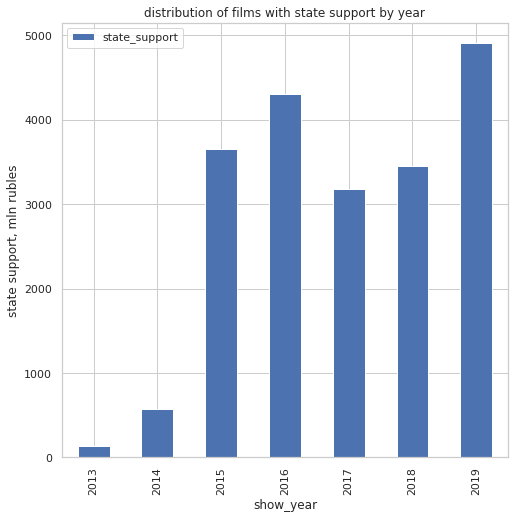

In [64]:
support_films.pivot_table(
    index='show_year', values='state_support', aggfunc='sum'
).plot(kind='bar', grid=True)
plt.ylabel('state support, mln rubles')
plt.title('distribution of films with state support by year')

***Анализ графика:*** 2016 год был объявлен годом Российского кино. Именно этим можно объяснить увеличение финансирования на 1 млрд в сравнении с предыдущим 2015 годом. 

- *исследование распределения фильмов с государственной поддрежкой по возрастному ограничению*

Text(0.5, 1.0, 'distribution of films with state support by age restriction')

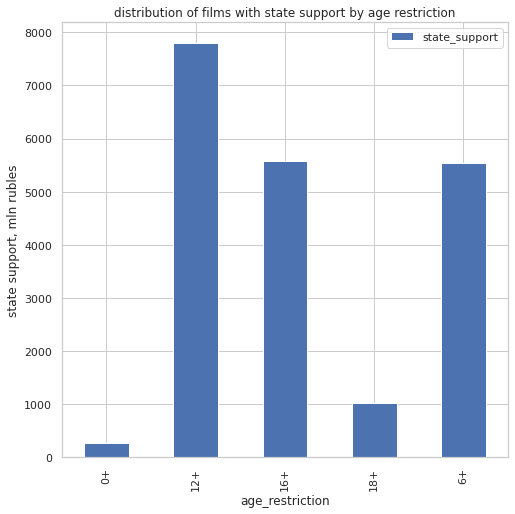

In [65]:
support_films.pivot_table(
    index='age_restriction', values='state_support', aggfunc='sum'
).plot(kind='bar', grid=True)
plt.ylabel('state support, mln rubles')
plt.title('distribution of films with state support by age restriction')

***Анализ графика:*** по данным графика видно, что государственные деньги выделяются на фильмы с возрастным ограничением "12+", т.е. на большую группу зрителей.

- *распределение средней окупаемости по годам*

Text(0, 0.5, 'box_office_ratio')

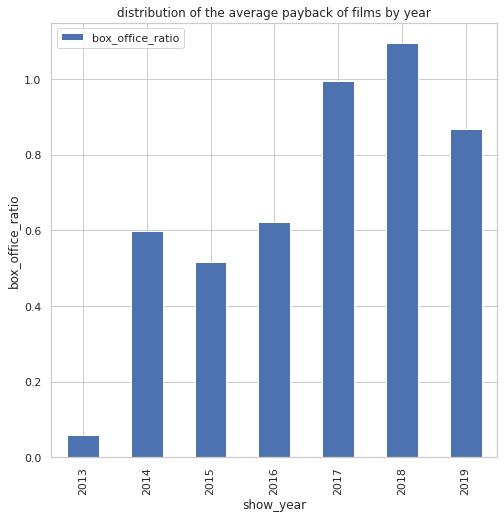

In [66]:
support_films.pivot_table(
    index='show_year', values='box_office_ratio'
).plot(kind='bar', grid=True)
plt.title('distribution of the average payback of films by year')
plt.ylabel('box_office_ratio')

***Анализ графика:*** при значении `box_office_ratio` > 1 фильм считается окупившимся. Значит, только в 2017 и 2018 годах фильмы, в среднем, окупались.

- *исследование самых окупившихся и неокупившихся фильмов*

Выведу 10 самых окупившихся фильмов, а так же посмотрю на их рейтинг:

In [67]:
support_films[['title', 'box_office_ratio', 'ratings']].sort_values(
    by='box_office_ratio', ascending=False
).head(10)

,title,box_office_ratio,ratings
326,Холоп,19.209804,6.8
213,Лёд,9.729984,NaN
217,Я худею,7.227251,6.9
130,"Гуляй, Вася !",6.643566,6.5
73,Самый Лучший День,5.229157,4.7
29,8 новых свиданий,5.081857,6.0
204,Ёлки Новые,4.905618,5.8
248,Непрощенный,4.767206,6.7
206,Движение вверх,4.709798,7.5
192,Последний богатырь,4.695441,6.8


И 10-ка неокупившихся фильмов:

In [68]:
support_films[['title', 'box_office_ratio', 'ratings']].sort_values(by='box_office_ratio').head(10)

,title,box_office_ratio,ratings
123,Я-Учитель,0.000017,7.4
156,День До,0.000099,4.8
86,Битва с экстрасенсами,0.000101,5.4
45,Вдвоем на льдине.,0.000117,6.6
169,Простая история .,0.000326,7.8
26,РЕВЕРБЕРАЦИЯ,0.000530,NaN
1,Бесславные придурки,0.000758,NaN
97,ВСЯ НАША НАДЕЖДА...,0.000777,7.2
101,Сдается дом со всеми неудобствами,0.000804,5.8
122,Память осени,0.000836,5.7


***Вывод:*** выведенные рейтинги к самым окупившимся и неокупившимся фильмам еще раз наглядно показывают, что явной корреляции между рейтингом и окупаемостью нет. 

### Общий вывод

В проекте я изучила российский кинопрокат и сделала следующие выводы:
- у популярных жанров рейтинги меньше, чем у менее популярных;
- самые частые жанры, на которые выделялась государственная поддержка, следующие: *драма, комедия, мультфильм*. Но при этом, зависимость окупившихся фильмов от рейтинга не соответсвует популярности фильма по рейтингу. Возможно, стоит обратить внимание на следующие жанры: *приключение, биография, боевик, спорт, триллер* - именно эти жанры фильмов выше всего оценивают зрители;
- чаще всего с увеличением государственного финансирования снижается окупаемость фильма;
- сборы не всегда коррелируются с рейтингом фильма, высокий рейтинг не гарантирует хорошие сборы, и наоборот;
- наиболее прибыльны фильмы с возрастным ограничением "16+", а фильмы с гос.поддержкой выпускают для категории "12+";
- в России в 2017 и 2018 годах фильмы, в среднем, окупались;
- самый окупившийся фильм в России за исследуемый период стал фильм "Холоп" (2019 года) - его прокатные сборы в 19 раз превзошли бюджет.